In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import numpy as np
from datetime import datetime

from matplotlib import cm

In [3]:
df = pd.read_excel('Data/cds_merged_ffil.xlsx')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Data/cds_merged_ffil.xlsx'

In [172]:
# Add datetime labels

# Get spread column names
colnames = list(df.columns.values)
spreadnames = colnames[7:]

datetimelabels = ['Time',0,0,0,0,0,0]
for spreadname in spreadnames:
    convertedspread = datetime.strptime(spreadname[9:],"%Y%m%d").date()
    datetimelabels += [convertedspread]
    
datetimelabels = {colnames[i]:datetimelabels[i] for i in range(len(datetimelabels))}

df = df.append(datetimelabels, ignore_index=True)

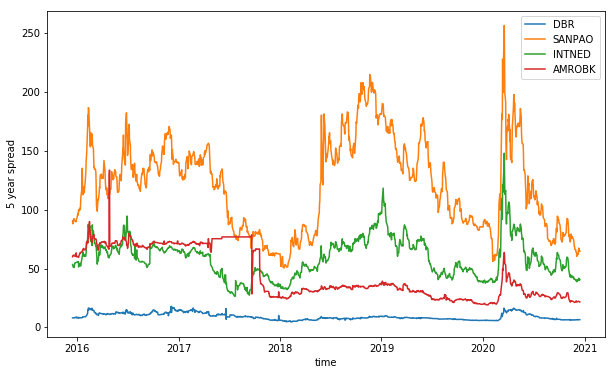

In [173]:
def plot_timeseries(tickers, time, all_series):
    fig = plt.figure(figsize=(10,6))
    for i,series in enumerate(all_series):
        timeval = time.values[0][7:]
        seriesval = series.values[0][7:]
        plt.plot(timeval, seriesval, label=tickers[i])
    
    plt.xlabel('time')
    plt.ylabel('5 year spread')
    plt.legend()
    plt.show()
    
tickers = ['DBR', 'SANPAO', 'INTNED', 'AMROBK']

plot_timeseries(tickers, df.loc[df['Ticker']=='Time'], [df.loc[df['Ticker']==j] for j in tickers])

In [174]:
# Change dataset layout
time = df.loc[df['Ticker']=='Time']

# Transpose data set
df = df.transpose()

# Set company name to column name
df.columns = df.loc['Ticker']

# Replace time data
df.index = df['Time'].values
df = df.drop(index=[0, 'Time'],columns=['Time'])

df = df.astype(float)

print(df)

Ticker         DBR   AMROBK  BACR-Bank      BNP    BYLAN     CMZB    CSGAG  \
2015-12-16  8.0987  59.9553    59.5979  70.2880  78.1634  89.5873  85.6969   
2015-12-17  8.1809  60.8999    58.2724  69.8070  78.8935  85.9924  84.5083   
2015-12-18  8.1656  61.2130    60.6409  71.5936  78.6469  90.5804  86.2609   
2015-12-21  8.1647  60.8928    61.2405  72.2154  78.7569  90.6353  87.5892   
2015-12-22  8.1754  61.2091    60.5956  72.2073  79.0299  90.3317  87.7539   
...            ...      ...        ...      ...      ...      ...      ...   
2020-12-09  6.5235  22.0942    55.6433  32.5913  62.9905  40.6808  47.7953   
2020-12-10  6.5237  22.1272    56.7779  32.7004  62.9857  41.9556  48.1526   
2020-12-11  6.5855  22.1437    63.0052  34.2687  62.9874  44.5100  50.8856   
2020-12-14  6.5254  21.7741    61.9210  33.0002  63.0366  42.9174  47.9454   
2020-12-15  6.5836  21.5890    61.5070  32.7952  62.9836  42.3321  48.4162   

Ticker           DB     DZBK     ERGBA  ...    UCBAG  BACF-Bank

In [199]:
df.to_csv('cleaned_spreads.csv')

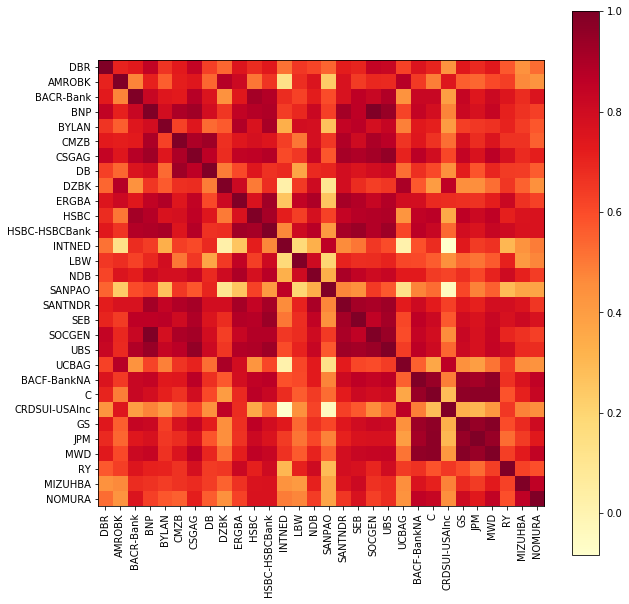

In [198]:
corr = df.corr()

fig = plt.figure(figsize=(10,10))
plt.imshow(corr, cmap='YlOrRd')
plt.yticks(ticks=range(corr.shape[0]), labels=df.columns)
plt.xticks(range(corr.shape[1]),labels=df.columns, rotation=90)
plt.colorbar()

plt.show()

### Country analysis

In [30]:
df_assets = df_assets = pd.read_csv('Data/market_cap.csv')
df_assets.head(30)

,Bank,Fullname,Assets,Country
0,DBR,Fed Rep Germany,NaN,Germany
1,AMROBK,ABN AMRO Bk NV,420.89,Netherlands
2,BACR-Bank,Barclays Bk plc,1510.14,United Kingdom
3,BNP,BNP Paribas,2398.01,France
4,BYLAN,Bay Landbk Giroz,266.27,Germany
5,CMZB,Commerzbank AG,478.40,Germany
6,CSGAG,Credit Suisse Gp AG,812.91,Switzerland
7,DB,Deutsche Bk AG,1456.26,Germany
8,DZBK,DZ Bk AG,627.31,Germany
9,ERGBA,Erste Group Bk AG,275.72,Austria


                Bank  Fullname  Assets
Country                               
Austria            1         1       1
Canada             1         1       1
France             2         2       2
Germany            8         8       5
Italy              1         1       1
Japan              2         2       2
Netherlands        2         2       2
Spain              1         1       1
Sweden             1         1       1
Switzerland        2         2       2
United Kingdom     3         3       3
United States      6         6       6


(array([5., 4., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.]),
 array([1.        , 1.58333333, 2.16666667, 2.75      , 3.33333333,
        3.91666667, 4.5       , 5.08333333, 5.66666667, 6.25      ,
        6.83333333, 7.41666667, 8.        ]),
 <a list of 12 Patch objects>)

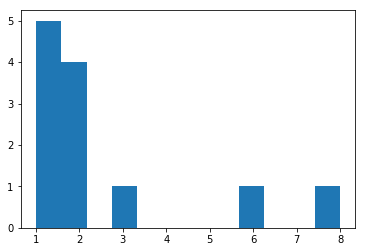

In [31]:
print(df_assets.groupby('Country').count())
plt.hist(df_assets.groupby('Country').count()["Bank"], bins=12)

[    nan  420.89 1510.14 2398.01  266.27  478.4   812.91 1456.26  627.31
  275.72 2715.15 2715.15 1000.72  287.99     nan 1057.82 1702.61  305.79
 1522.05  972.18     nan 2434.08 1951.16  812.91  992.97 2687.38  895.43
 1116.31 1874.89  425.5 ]


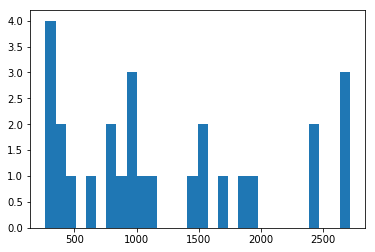

In [33]:
print(df_assets['Assets'].values)

plt.hist(df_assets['Assets'].astype('float').values, bins=30)
plt.show()